In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import scipy.stats as stats
import os

'''
import matplotlib
from matplotlib import rcParams
matplotlib.use('Agg')
plt.style.use('seaborn-white')
rcParams['figure.figsize'] = 11.7, 8.27
rcParams['figure.figsize'] = 6, 6
rcParams['figure.dpi'] = 600
rcParams['figure.subplot.left'] = 0.12
rcParams['figure.subplot.right'] = 0.95
rcParams['figure.subplot.bottom'] = 0.1
rcParams['figure.subplot.top'] = 0.95
rcParams['axes.grid'] = False
rcParams['grid.linestyle'] = ":"
rcParams['xtick.major.bottom'] = True
rcParams['xtick.bottom'] = True
rcParams['ytick.left'] = True
rcParams['ytick.minor.visible'] = True
rcParams['ytick.minor.size'] = 0.05
rcParams['ytick.minor.width'] = 0.04
rcParams['ytick.major.left'] = True
# Font
# rcParams['font.family'] = "serif"
# rcParams['font.style'] = "normal"
rcParams['text.usetex'] = True
rcParams['ps.fonttype'] = 42
# Lines
rcParams['lines.linewidth'] = 3
rcParams['lines.markersize'] = 6

font_value = 24  # Use 50 for the variance plots
font_value = 50  # Use 50 for the variance plots
rcParams['font.size'] = font_value
# Set specific values for the font relative to font.size
# ## small, medium, large, x-large, xx-large, larger, or smaller
rcParams['axes.titleweight'] = "bold"
# rcParams['axes.labelsize'] = "xx-large"
# rcParams['legend.fontsize'] = "xx-large"
rcParams['legend.title_fontsize'] = 100
'''

'\nimport matplotlib\nfrom matplotlib import rcParams\nmatplotlib.use(\'Agg\')\nplt.style.use(\'seaborn-white\')\nrcParams[\'figure.figsize\'] = 11.7, 8.27\nrcParams[\'figure.figsize\'] = 6, 6\nrcParams[\'figure.dpi\'] = 600\nrcParams[\'figure.subplot.left\'] = 0.12\nrcParams[\'figure.subplot.right\'] = 0.95\nrcParams[\'figure.subplot.bottom\'] = 0.1\nrcParams[\'figure.subplot.top\'] = 0.95\nrcParams[\'axes.grid\'] = False\nrcParams[\'grid.linestyle\'] = ":"\nrcParams[\'xtick.major.bottom\'] = True\nrcParams[\'xtick.bottom\'] = True\nrcParams[\'ytick.left\'] = True\nrcParams[\'ytick.minor.visible\'] = True\nrcParams[\'ytick.minor.size\'] = 0.05\nrcParams[\'ytick.minor.width\'] = 0.04\nrcParams[\'ytick.major.left\'] = True\n# Font\n# rcParams[\'font.family\'] = "serif"\n# rcParams[\'font.style\'] = "normal"\nrcParams[\'text.usetex\'] = True\nrcParams[\'ps.fonttype\'] = 42\n# Lines\nrcParams[\'lines.linewidth\'] = 3\nrcParams[\'lines.markersize\'] = 6\n\nfont_value = 24  # Use 50 for the

In [29]:

suffixes = ["fixed", "ours", "oursplus"]
cloth_types = ["orange", "white", "blue"]
for cloth_type in cloth_types:
    print(cloth_type)
    df = pd.read_csv(f"/home/julius/robotics/real_runs/{cloth_type}_results.csv")
    rewards = {}
    for base in suffixes:
        base_result = df[f"{base}-0"] + df[f"{base}-1"]
        print(base, np.mean(base_result))
        for compare in suffixes:
            compare_result = df[f"{compare}-0"] + df[f"{compare}-1"]

            U1_exact, p_exact = mannwhitneyu(base_result, compare_result, method="exact")
            U1_asymp, p_asymp = mannwhitneyu(base_result, compare_result, method="asymptotic")
            print(f"vs {compare} Exact p", p_exact)
            print(f"vs {compare} Asymp p", p_asymp)
        print("\n")
    print("---------------------\n")


orange
fixed 4.56
vs fixed Exact p 1.0
vs fixed Asymp p 1.0
vs ours Exact p 0.06301283855463422
vs ours Asymp p 0.0579271085688289
vs oursplus Exact p 4.330035289787612e-05
vs oursplus Asymp p 0.0003281333148201423


ours 4.0699999999999985
vs fixed Exact p 0.06301283855463422
vs fixed Asymp p 0.0579271085688289
vs ours Exact p 1.0
vs ours Asymp p 1.0
vs oursplus Exact p 0.00020567667626491154
vs oursplus Asymp p 0.0007510688919945186


oursplus 1.95
vs fixed Exact p 4.330035289787612e-05
vs fixed Asymp p 0.0003281333148201423
vs ours Exact p 0.00020567667626491154
vs ours Asymp p 0.0007510688919945186
vs oursplus Exact p 1.0
vs oursplus Asymp p 1.0


---------------------

white
fixed 6.26
vs fixed Exact p 1.0
vs fixed Asymp p 1.0
vs ours Exact p 1.082508822446903e-05
vs ours Asymp p 0.00017661101166893502
vs oursplus Exact p 1.082508822446903e-05
vs oursplus Asymp p 0.00017661101166893502


ours 3.0900000000000003
vs fixed Exact p 1.082508822446903e-05
vs fixed Asymp p 0.000176611011

In [9]:
'''
for suffix in suffixes:
    print(suffix)
    fig, axs = plt.subplots(1, 3, figsize=(20,4))
    for i in range(1):
        for i, cloth_type in enumerate(cloth_types):
            label = f"{suffix}, {cloth_type}, {i}"
            if cloth_type == "white":
                color = "lightgray"
            if cloth_type == "orange":
                color = "orange"
            if cloth_type == "blue":
                color = "lightblue"
            vals = dfs[suffix][f"{cloth_type}-{0}"] + dfs[suffix][f"{cloth_type}-{1}"]
            #print("vals sha", vals)
            n, bins, patches = axs[i].hist(vals, 30, density=True)
            x = np.linspace(0, 10, 1000)
            axs[i].plot(x, stats.norm.pdf(x, vals.mean(), vals.std()))
        #plt.xlim([0, 8])
        #fig.legend()
        #plt.savefig(f'{suffix}.pdf')
        #plt.clf()
'''

'\nfor suffix in suffixes:\n    print(suffix)\n    fig, axs = plt.subplots(1, 3, figsize=(20,4))\n    for i in range(1):\n        for i, cloth_type in enumerate(cloth_types):\n            label = f"{suffix}, {cloth_type}, {i}"\n            if cloth_type == "white":\n                color = "lightgray"\n            if cloth_type == "orange":\n                color = "orange"\n            if cloth_type == "blue":\n                color = "lightblue"\n            vals = dfs[suffix][f"{cloth_type}-{0}"] + dfs[suffix][f"{cloth_type}-{1}"]\n            #print("vals sha", vals)\n            n, bins, patches = axs[i].hist(vals, 30, density=True)\n            x = np.linspace(0, 10, 1000)\n            axs[i].plot(x, stats.norm.pdf(x, vals.mean(), vals.std()))\n        #plt.xlim([0, 8])\n        #fig.legend()\n        #plt.savefig(f\'{suffix}.pdf\')\n        #plt.clf()\n'

In [23]:


fixed_dfs = [pd.read_csv(os.path.join("stats", "full", f, "progress.csv")) for f in os.listdir("stats/full") if os.path.isdir(os.path.join("stats", "full", f))]
single_dfs = [pd.read_csv(os.path.join("stats", "single", f, "progress.csv")) for f in os.listdir("stats/single") if os.path.isdir(os.path.join("stats", "single", f))]
multi_dfs = [pd.read_csv(os.path.join("stats", "multi", f, "progress.csv")) for f in os.listdir("stats/multi") if os.path.isdir(os.path.join("stats", "multi", f))]
fig, ax1 = plt.subplots(1, 1, figsize=(6,3))
titles = ["Fixed", "Ours", "Ours+"]
dfs = [fixed_dfs, single_dfs, multi_dfs]
for i,df in enumerate(dfs):
    stacked = None
    for j, d in enumerate(df):
        vals = d["suite/constant_cloth_success_rate"][:100]
        if stacked is None:
            stacked = vals
        else:
            stacked = np.vstack([stacked,vals])
    mean = np.mean(stacked, axis=0)
    std = np.std(stacked, axis=0)
    ax1.plot(range(1,101), mean, label=titles[i])
    ax1.fill_between(range(1,101), mean-std, np.clip(mean+std, 0,1), alpha = 0.3)
    ax1.set_xlabel('Epoch', fontsize=15)
    ax1.legend()
    if i == 0:
        ax1.set_ylabel('Success rate')
plt.savefig("success.pdf")
fig, ax2 = plt.subplots(1, 1, figsize=(6,3))
for i,df in enumerate(dfs):
    stacked = None
    for j, d in enumerate(df):
        vals = d["suite/constant_cloth_corner_0"][:100] + d["suite/constant_cloth_corner_1"][:100]
        if stacked is None:
            stacked = vals
        else:
            stacked = np.vstack([stacked,vals])
    mean = np.mean(stacked, axis=0)
    std = np.std(stacked, axis=0)
    ax2.plot(range(1,101), mean, label=titles[i])
    ax2.fill_between(range(1,101), mean-std, mean+std, alpha = 0.5)
    ax2.set_xlabel('Epoch', fontsize=15)
    ax2.set_ylim([0.02, 0.4])
    ax2.legend()
    if i == 0:
        ax2.set_ylabel('Corner distance')

plt.savefig("corners.pdf")        
rcParams['font.size'] = 12
fig, (ax3) = plt.subplots(1, 1, figsize=(6,3))
for i,df in enumerate(dfs):
    stacked = None
    for j, d in enumerate(df):
        vals = d["suite/constant_cloth_corner_0"][79:100] + d["suite/constant_cloth_corner_1"][79:100]
        if stacked is None:
            stacked = vals
        else:
            stacked = np.vstack([stacked,vals])
    mean = np.mean(stacked, axis=0)
    std = np.std(stacked, axis=0)
    ax3.plot(range(80,101), mean, label=titles[i])
    ax3.fill_between(range(80,101), mean-std, mean+std, alpha = 0.5)
    ax3.set_xlabel('Epoch', fontsize=15)
    ax3.set_xticks([80, 85, 90, 95, 100])
    ax3.set_ylim([0.01, 0.1])
    ax3.legend()
    if i == 0:
        ax3.set_ylabel('Corner distance (epochs 80-100)')
plt.savefig("corners_zoomed.pdf")

No handles with labels found to put in legend.


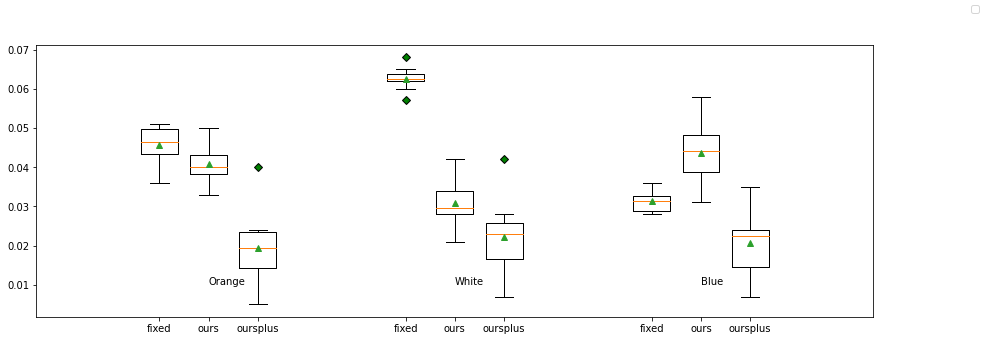

In [31]:
suffixes = ["fixed", "ours", "oursplus"]
#rcParams['font.size'] = 18
green_diamond = dict(markerfacecolor='g', marker='D')

fig7, ax7 = plt.subplots(figsize=(15,5))
ax7.annotate('Orange', xy=(0,0.01))
ax7.annotate('White', xy=(1, 0.01))
ax7.annotate('Blue', xy=(2, 0.01))
for j,cloth_type in enumerate(["orange", "white", "blue"]):
    df = pd.read_csv(f"/home/julius/robotics/real_runs/{cloth_type}_results.csv")
    exp_data = []
    for i,suffix in enumerate(suffixes):
        d = df[f"{suffix}-0"] + df[f"{suffix}-1"]
        exp_data.append(d/100)
    ax7.boxplot(exp_data, showmeans=True, flierprops=green_diamond, positions=[-0.2+j,0.0+j,0.2+j], labels=suffixes)
        
fig7.legend()
plt.show()